In [1]:
import ctypes
import networkx
import json
import matplotlib.pyplot as plt
from networkx.readwrite import json_graph

In [2]:
_evolution = ctypes.CDLL('./_evolution.so')

### Test if the shared library is loaded.

In [3]:
_evolution.get_info.restype = ctypes.c_char_p
result = _evolution.get_info(ctypes.c_int(0),ctypes.c_int(0))
print(result)
#_tbg_test.free(result)

b'test'


### Now execute the mutations test and see what it does.

In [34]:
 result = _evolution.experiment_test_mutations()

In [21]:
_evolution.get_individual_json.restype = ctypes.c_char_p
result = _evolution.get_individual_json(ctypes.c_int(0),ctypes.c_int(0))
print(result)

b'{"nodes": [{"id":"0","group":"test","parameters":[0.538055]},{"id":"1","group":"test","parameters":[0.249262]},{"id":"2","group":"test","parameters":[0.206280]},{"id":"3","group":"test","parameters":[0.002209]},{"id":"4","group":"test","parameters":[0.537030]},{"id":"5","group":"test","parameters":[0.481124]},{"id":"6","group":"test","parameters":[0.133548]}],"links": [{"source":"6","target":"5","sourcenode":0,"targetnode":0},{"source":"6","target":"5","sourcenode":0,"targetnode":1},{"source":"6","target":"4","sourcenode":0,"targetnode":1},{"source":"5","target":"3","sourcenode":0,"targetnode":0},{"source":"6","target":"3","sourcenode":0,"targetnode":1},{"source":"4","target":"2","sourcenode":0,"targetnode":0},{"source":"2","target":"1","sourcenode":0,"targetnode":0},{"source":"2","target":"1","sourcenode":0,"targetnode":1},{"source":"2","target":"0","sourcenode":0,"targetnode":0},{"source":"6","target":"0","sourcenode":0,"targetnode":1}]}'


### Now create a networx chart from this data (parent 1).

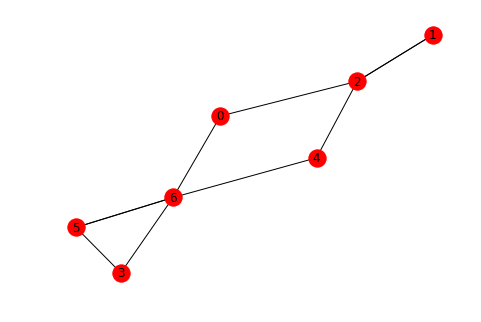

In [22]:
json_data = json.loads(result)

g = json_graph.node_link_graph(json_data)

networkx.draw(g,with_labels=True)
plt.draw()
plt.show()


### parent 2

In [23]:
def showindividual(t_individual):
    result = _evolution.get_individual_json(ctypes.c_int(0),ctypes.c_int(t_individual))

    json_data = json.loads(result)

    g = json_graph.node_link_graph(json_data)

    networkx.draw(g,with_labels=True)
    plt.draw()
    plt.show()

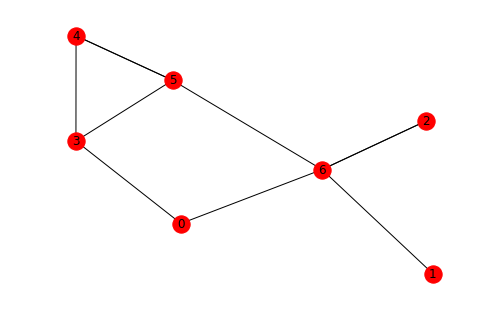

In [24]:
showindividual(1)

### Child

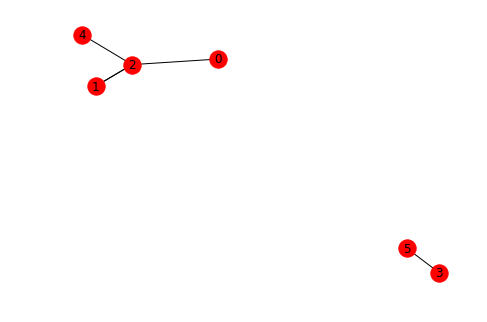

In [25]:
showindividual(2)

### A copy of the child.

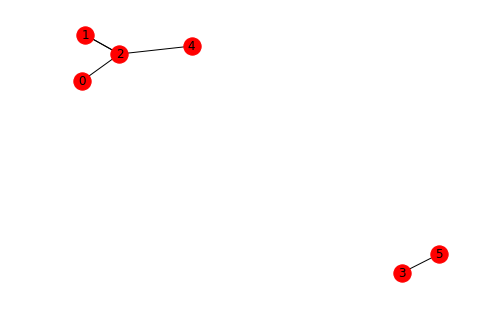

In [26]:
showindividual(3)

### Adding 1 component to the child.

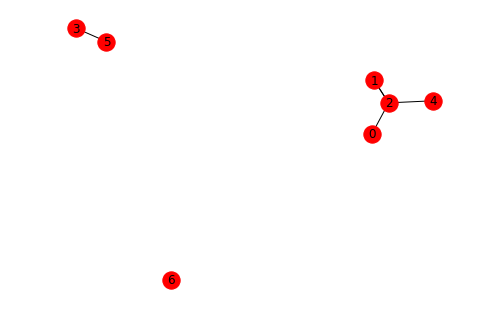

In [27]:
showindividual(4)

### Remove one component.

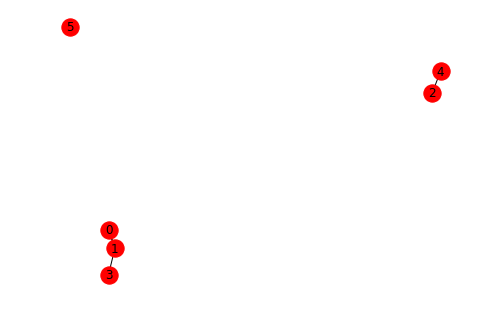

In [29]:
showindividual(5)

### Disconnect random nodes.

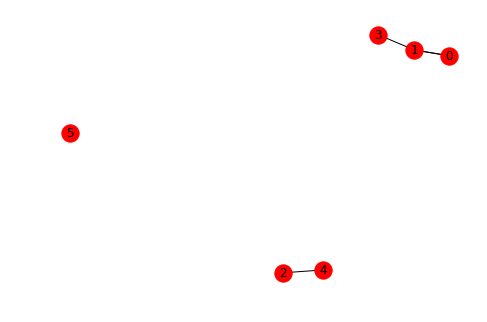

In [30]:
showindividual(6)

### Connect random nodes.

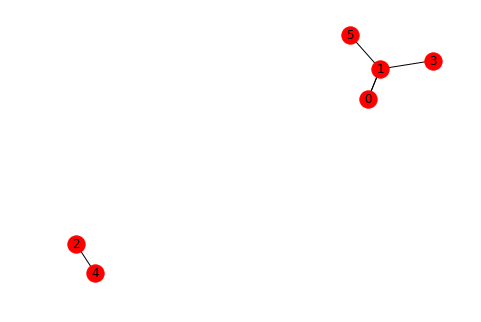

In [31]:
showindividual(7)

### Flip 2 components.

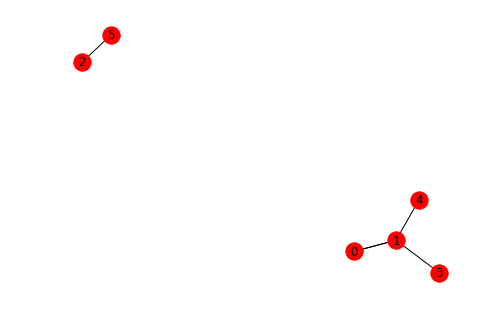

In [32]:
showindividual(8)

### Shuffle and reconnect.

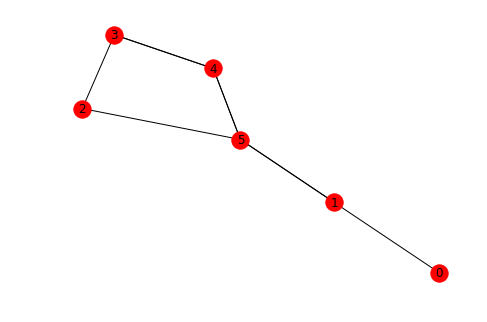

In [33]:
showindividual(9)